In [32]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt



# Load the breast cancer dataset
data = pd.read_csv('data/cancer_data.csv')



In [22]:
y = data['diagnosis']
y = y.map({'M': 1, 'B': 0})
list = ['Unnamed: 32','id','diagnosis']
X = data.drop(list,axis = 1 )

In [23]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with StandardScaler for preprocessing
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step: standardization
    ('classifier', RandomForestClassifier())  
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Explore Clustering (KMeans example)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)

# Predict clusters for training and test sets
train_clusters = kmeans.predict(X_train)
test_clusters = kmeans.predict(X_test)

# Explore Classification 
pipeline.set_params(classifier=RandomForestClassifier(random_state=42))
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Evaluate the classification model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Output the results
print(f"Classification accuracy: {accuracy:.2f}")
print(f"Classification report:\n{report}")

Classification accuracy: 0.96
Classification report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114




Classifier: Random Forest
Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



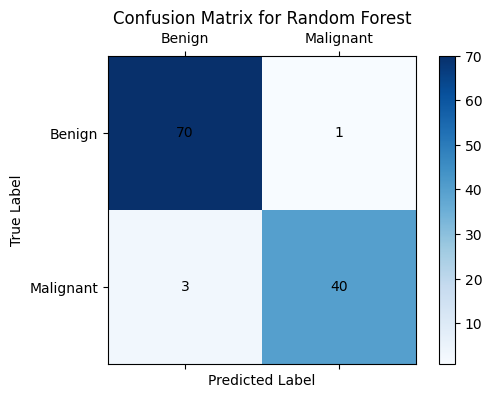


Classifier: Logistic Regression
Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



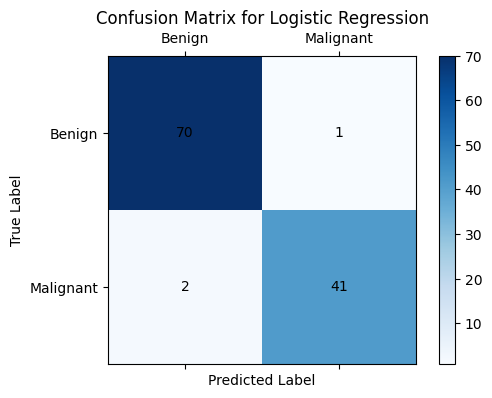


Classifier: K-Nearest Neighbors
Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



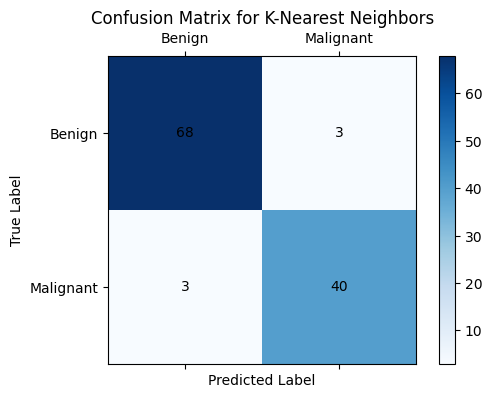


Classifier: SVM
Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



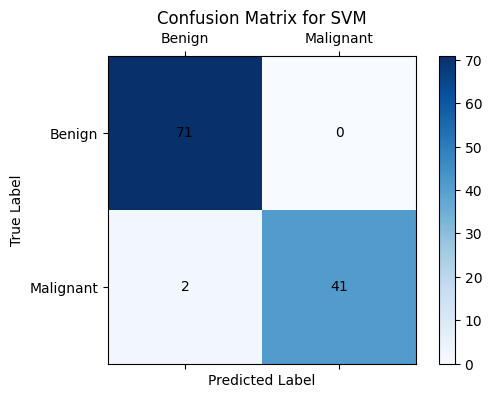

In [31]:
# List of classifiers to explore
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'SVM': SVC(random_state=42)
}
# Function to plot confusion matrix using only matplotlib
def plot_confusion_matrix(cm, classifier_name):
    fig, ax = plt.subplots(figsize=(6, 4))
    cax = ax.matshow(cm, cmap='Blues')
    fig.colorbar(cax)

    # Set up axes
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(['Benign', 'Malignant'])
    ax.set_yticklabels(['Benign', 'Malignant'])

    # Label axes
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for {classifier_name}')

    # Loop over data dimensions and create text annotations.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'), ha="center", va="center", color="black")

    plt.show()
    
# Iterate over classifiers and evaluate each
for name, classifier in classifiers.items():
    # Create the pipeline with StandardScaler and the classifier
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Preprocessing step: standardization
        ('classifier', classifier)     # Classifier step
    ])
    
    # Fit the pipeline to the training data
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)
    
     # Evaluate the classifier
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Output the results
    print(f"\nClassifier: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Classification Report:\n{report}")
    
    # Plot the confusion matrix using the custom function
    plot_confusion_matrix(conf_matrix, name)


Tuning hyperparameters for Random Forest...

Best hyperparameters for Random Forest: {'classifier': RandomForestClassifier(random_state=42), 'classifier__max_depth': None, 'classifier__n_estimators': 200}
Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



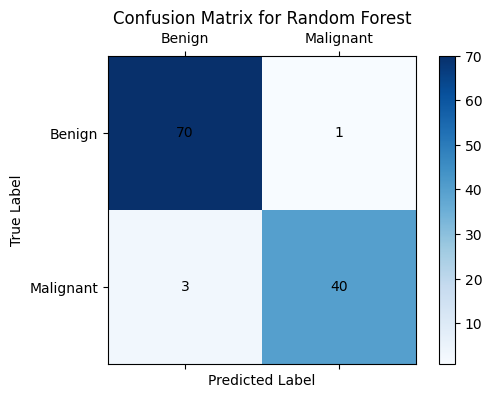


Tuning hyperparameters for Logistic Regression...

Best hyperparameters for Logistic Regression: {'classifier': LogisticRegression(max_iter=1000, random_state=42), 'classifier__C': 1, 'classifier__penalty': 'l2'}
Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



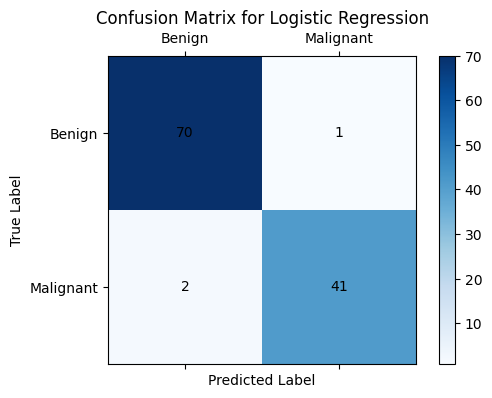


Tuning hyperparameters for K-Nearest Neighbors...

Best hyperparameters for K-Nearest Neighbors: {'classifier': KNeighborsClassifier(), 'classifier__n_neighbors': 5, 'classifier__weights': 'uniform'}
Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



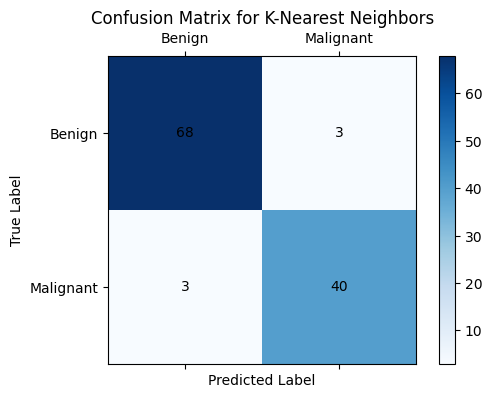


Tuning hyperparameters for SVM...

Best hyperparameters for SVM: {'classifier': SVC(random_state=42), 'classifier__C': 0.1, 'classifier__kernel': 'linear'}
Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



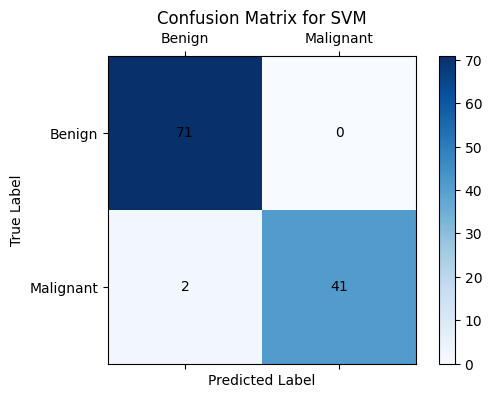

In [36]:
#Set up the classifiers and their corresponding parameter grids
param_grid = {
    'Random Forest': {
        'classifier': [RandomForestClassifier(random_state=42)],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20],
    },
    'Logistic Regression': {
        'classifier': [LogisticRegression(max_iter=1000, random_state=42)],
        'classifier__C': [0.1, 1, 10],
        'classifier__penalty': ['l2']
    },
    'K-Nearest Neighbors': {
        'classifier': [KNeighborsClassifier()],
        'classifier__n_neighbors': [3, 5, 7],
        'classifier__weights': ['uniform', 'distance']
    },
    'SVM': {
        'classifier': [SVC(random_state=42)],
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf']
    }
}

# Iterate over classifiers and tune hyperparameters using GridSearchCV
for name, params in param_grid.items():
    print(f"\nTuning hyperparameters for {name}...")

    # Create the pipeline with StandardScaler and a placeholder classifier
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Preprocessing step: standardization
        ('classifier', RandomForestClassifier())  # Placeholder for classifier
    ])

    # Set up GridSearchCV with the current classifier's parameter grid
    grid_search = GridSearchCV(pipeline, param_grid=params, cv=5, scoring='accuracy')

    # Fit the GridSearchCV model to find the best hyperparameters
    grid_search.fit(X_train, y_train)

    # Best model after hyperparameter tuning
    best_model = grid_search.best_estimator_

    # Make predictions on the test data using the best model
    y_pred = best_model.predict(X_test)

    # Evaluate the tuned classifier
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Output the results
    print(f"\nBest hyperparameters for {name}: {grid_search.best_params_}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Classification Report:\n{report}")
    
    # Plot the confusion matrix using the custom function
    plot_confusion_matrix(conf_matrix, name)


Classifier: Random Forest
Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



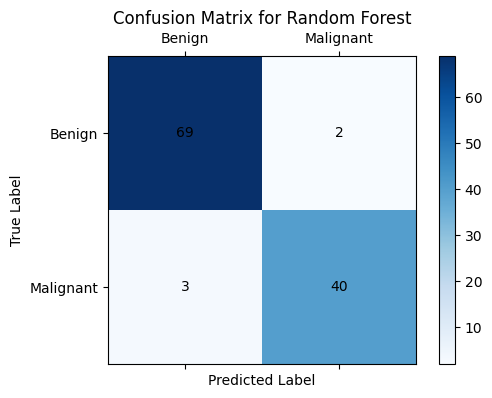


Classifier: Logistic Regression
Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



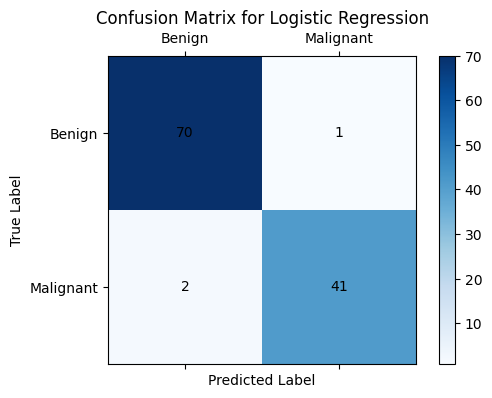


Classifier: K-Nearest Neighbors
Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



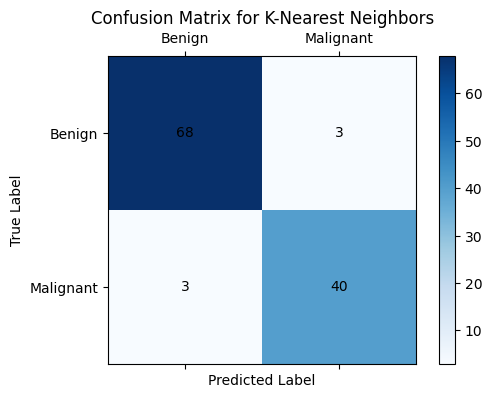


Classifier: SVM
Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



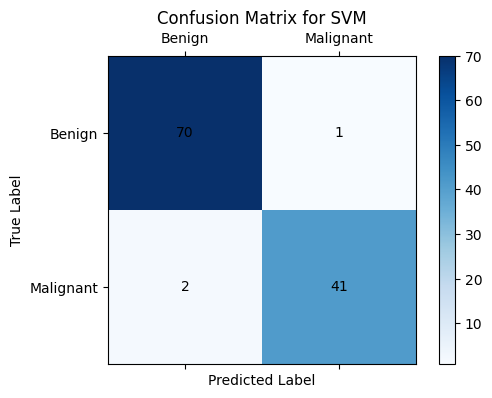

In [37]:

# Step 1: Perform KMeans clustering on the training data
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels_train = kmeans.fit_predict(X_train)  # Train clusters
cluster_labels_test = kmeans.predict(X_test)  # Test clusters

# Step 2: Add the cluster labels as a new feature to the training and test datasets
X_train_with_clusters = X_train.copy()
X_train_with_clusters['cluster'] = cluster_labels_train

X_test_with_clusters = X_test.copy()
X_test_with_clusters['cluster'] = cluster_labels_test

# Step 3: Create a pipeline with a classifier (e.g., Random Forest)
# You can add more classifiers like LogisticRegression, KNeighborsClassifier, SVC in a similar way.
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'SVM': SVC(random_state=42)
}

# Iterate over classifiers and evaluate each
for name, classifier in classifiers.items():
    print(f"\nClassifier: {name}")
    
    # Step 4: Create the pipeline with StandardScaler and the classifier
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Standardization step
        ('classifier', classifier)     # Classifier step
    ])
    
    # Step 5: Fit the pipeline to the training data
    pipeline.fit(X_train_with_clusters, y_train)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(X_test_with_clusters)
    
    # Step 6: Evaluate the classifier
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Output the results
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Classification Report:\n{report}")
    
    # Plot the confusion matrix (optional)
    def plot_confusion_matrix(cm, classifier_name):
        fig, ax = plt.subplots(figsize=(6, 4))
        cax = ax.matshow(cm, cmap='Blues')
        fig.colorbar(cax)
        ax.set_xticks([0, 1])
        ax.set_yticks([0, 1])
        ax.set_xticklabels(['Benign', 'Malignant'])
        ax.set_yticklabels(['Benign', 'Malignant'])
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title(f'Confusion Matrix for {classifier_name}')
        for i in range(cm.shape[0]):
            for j in range(cm.shape[1]):
                ax.text(j, i, format(cm[i, j], 'd'), ha="center", va="center", color="black")
        plt.show()

    # Plot confusion matrix for the current classifier
    plot_confusion_matrix(conf_matrix, name)



Tuning hyperparameters for Random Forest...

Best hyperparameters for Random Forest: {'classifier': RandomForestClassifier(random_state=42), 'classifier__max_depth': None, 'classifier__n_estimators': 200}
Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



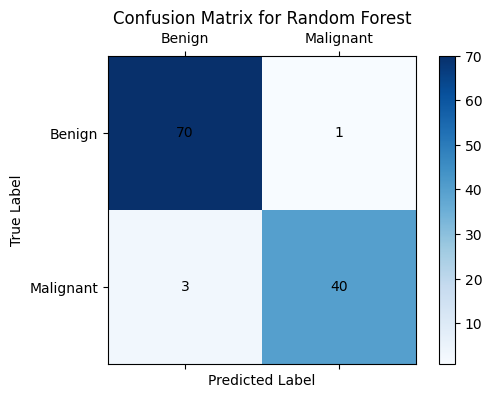


Tuning hyperparameters for Logistic Regression...

Best hyperparameters for Logistic Regression: {'classifier': LogisticRegression(max_iter=1000, random_state=42), 'classifier__C': 10, 'classifier__penalty': 'l2'}
Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



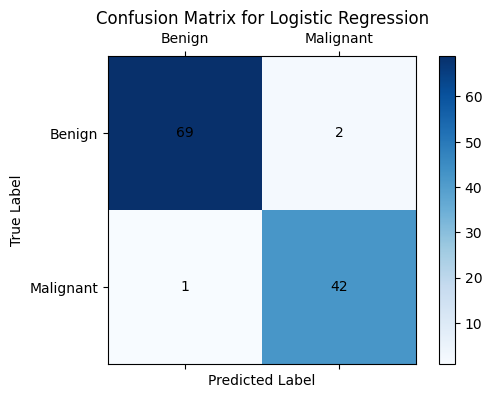


Tuning hyperparameters for K-Nearest Neighbors...

Best hyperparameters for K-Nearest Neighbors: {'classifier': KNeighborsClassifier(), 'classifier__n_neighbors': 3, 'classifier__weights': 'uniform'}
Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



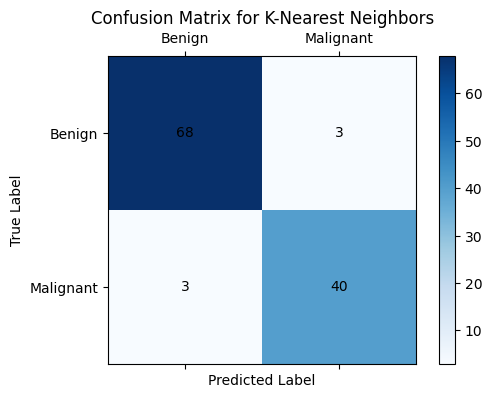


Tuning hyperparameters for SVM...

Best hyperparameters for SVM: {'classifier': SVC(random_state=42), 'classifier__C': 1, 'classifier__kernel': 'linear'}
Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



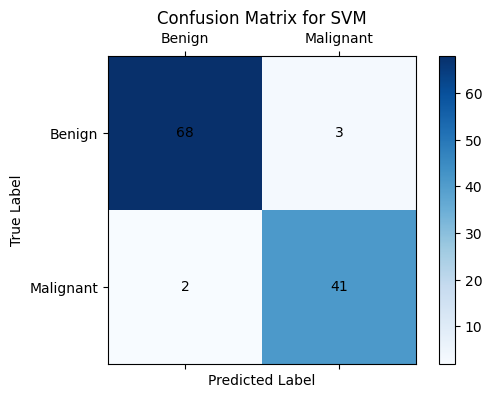

In [39]:
##Repeat of the above with recall instead of accuracy 
#Set up the classifiers and their corresponding parameter grids
param_grid = {
    'Random Forest': {
        'classifier': [RandomForestClassifier(random_state=42)],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20],
    },
    'Logistic Regression': {
        'classifier': [LogisticRegression(max_iter=1000, random_state=42)],
        'classifier__C': [0.1, 1, 10],
        'classifier__penalty': ['l2']
    },
    'K-Nearest Neighbors': {
        'classifier': [KNeighborsClassifier()],
        'classifier__n_neighbors': [3, 5, 7],
        'classifier__weights': ['uniform', 'distance']
    },
    'SVM': {
        'classifier': [SVC(random_state=42)],
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf']
    }
}

# Iterate over classifiers and tune hyperparameters using GridSearchCV
for name, params in param_grid.items():
    print(f"\nTuning hyperparameters for {name}...")

    # Create the pipeline with StandardScaler and a placeholder classifier
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Preprocessing step: standardization
        ('classifier', RandomForestClassifier())  # Placeholder for classifier
    ])

    # Set up GridSearchCV with the current classifier's parameter grid
    grid_search = GridSearchCV(pipeline, param_grid=params, cv=5, scoring='recall')

    # Fit the GridSearchCV model to find the best hyperparameters
    grid_search.fit(X_train, y_train)

    # Best model after hyperparameter tuning
    best_model = grid_search.best_estimator_

    # Make predictions on the test data using the best model
    y_pred = best_model.predict(X_test)

    # Evaluate the tuned classifier
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Output the results
    print(f"\nBest hyperparameters for {name}: {grid_search.best_params_}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Classification Report:\n{report}")
    
    # Plot the confusion matrix using the custom function
    plot_confusion_matrix(conf_matrix, name)


Tuning hyperparameters for Random Forest...

Best hyperparameters for Random Forest: {'classifier': RandomForestClassifier(random_state=42), 'classifier__max_depth': None, 'classifier__n_estimators': 200}
Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



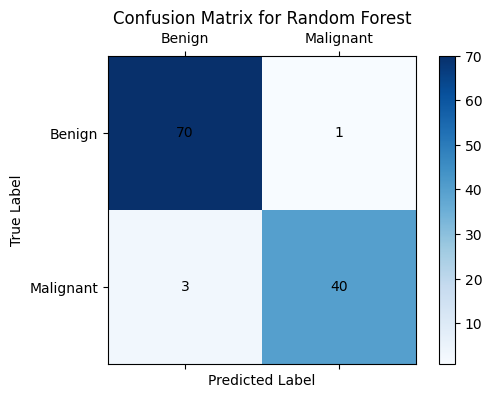


Tuning hyperparameters for Logistic Regression...

Best hyperparameters for Logistic Regression: {'classifier': LogisticRegression(max_iter=1000, random_state=42), 'classifier__C': 10, 'classifier__penalty': 'l2'}
Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



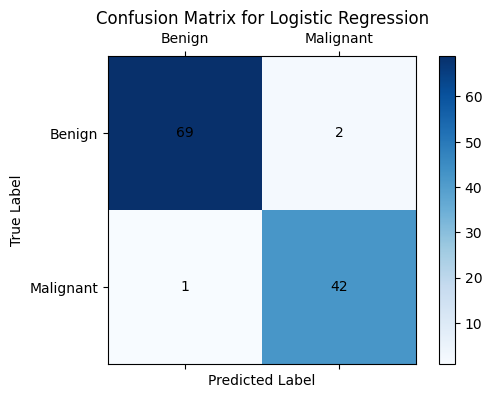


Tuning hyperparameters for K-Nearest Neighbors...

Best hyperparameters for K-Nearest Neighbors: {'classifier': KNeighborsClassifier(), 'classifier__n_neighbors': 3, 'classifier__weights': 'uniform'}
Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



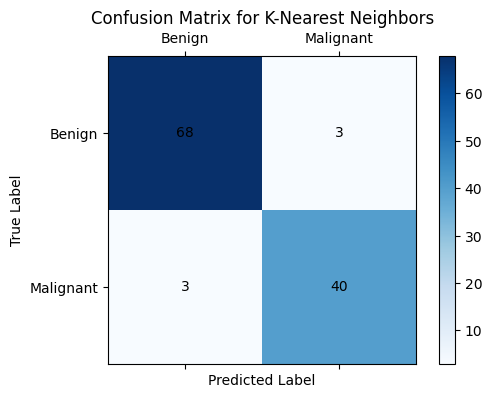


Tuning hyperparameters for SVM...

Best hyperparameters for SVM: {'classifier': SVC(random_state=42), 'classifier__C': 10, 'classifier__kernel': 'rbf'}
Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



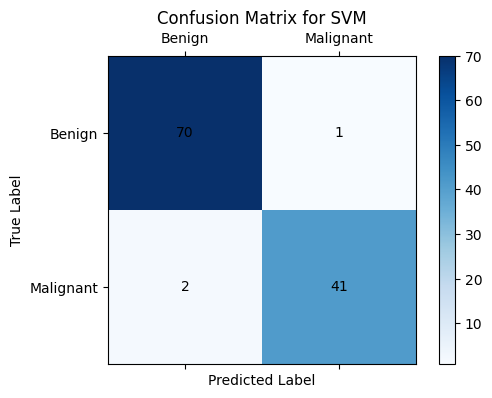

In [41]:
##Repeat of the above with recall instead of accuracy 
#Set up the classifiers and their corresponding parameter grids
param_grid = {
    'Random Forest': {
        'classifier': [RandomForestClassifier(random_state=42)],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20],
    },
    'Logistic Regression': {
        'classifier': [LogisticRegression(max_iter=1000, random_state=42)],
        'classifier__C': [0.1, 10, 10],
        'classifier__penalty': ['l2']
    },
    'K-Nearest Neighbors': {
        'classifier': [KNeighborsClassifier()],
        'classifier__n_neighbors': [3, 5, 7, 9, 11],
        'classifier__weights': ['uniform', 'distance']
    },
    'SVM': {
        'classifier': [SVC(random_state=42)],
        'classifier__C': [0.1, 10, 10],
        'classifier__kernel': ['linear', 'rbf']
    }
}

# Iterate over classifiers and tune hyperparameters using GridSearchCV
for name, params in param_grid.items():
    print(f"\nTuning hyperparameters for {name}...")

    # Create the pipeline with StandardScaler and a placeholder classifier
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Preprocessing step: standardization
        ('classifier', RandomForestClassifier())  # Placeholder for classifier
    ])

    # Set up GridSearchCV with the current classifier's parameter grid
    grid_search = GridSearchCV(pipeline, param_grid=params, cv=5, scoring='recall')

    # Fit the GridSearchCV model to find the best hyperparameters
    grid_search.fit(X_train, y_train)

    # Best model after hyperparameter tuning
    best_model = grid_search.best_estimator_

    # Make predictions on the test data using the best model
    y_pred = best_model.predict(X_test)

    # Evaluate the tuned classifier
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Output the results
    print(f"\nBest hyperparameters for {name}: {grid_search.best_params_}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Classification Report:\n{report}")
    
    # Plot the confusion matrix using the custom function
    plot_confusion_matrix(conf_matrix, name)